# **Problema Maximum Cut**

Vamos a resolver uno de los problemas cuyo modelado es uno de los mas sencillos para ser tratado como un problema de optimización cuadratica sin restricciones (QUBO). En el problema `Max Cut` nuestro objetivo es maximizar el número de bordes cortados en un gráfico. En otras palabras, queremos dividir el conjunto de nodos en el gráfico en dos subconjuntos para que tengamos el mayor numero posbile de aristas que unan los dos subconjuntos. Para este ejemplo, el numero maximo de corte es 5.

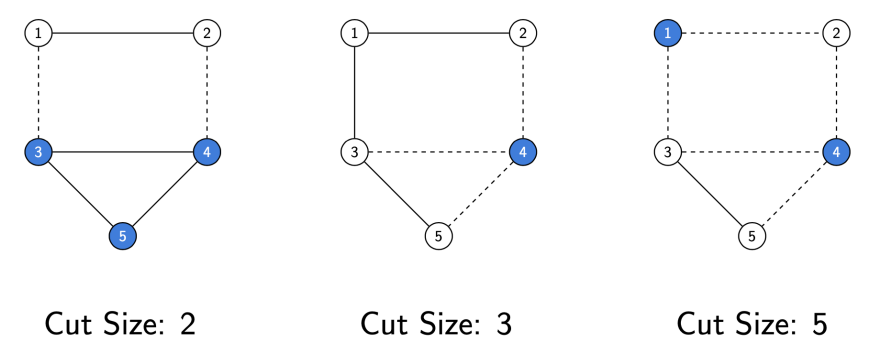

La función QUBO que modela este problema viene dado por la siguiente expresión:


$$min(\sum_{i,j}-x_{i} - x_{j} + 2x_{i}x_{j})$$

Bajo esta formulación estamos asignado a cada nodo $i$ la variable binaria $x_{i}$, el valor de esta variable es $0$ si el nodo $x_{i}$ pertenece a un conjunto o posee el valor 1 si pertenece al conjunto complementario. Este es un problema de maximización, puesto lo que queremos es generar el maximo numero de aristas que conctan los dos subconjuntos.

## Librerias

In [1]:
import networkx as nx
import random
import numpy as np
import dwave_networkx as dnx
import dimod
from dimod import Binary
from dwave.system import DWaveSampler, LazyFixedEmbeddingComposite
import dwave.inspector

In [2]:
G = nx.Graph()
G.add_edges_from([(0,4),(0,5),(1,2),(1,6),(2,4),(3,7),(5,6),(6,7)])

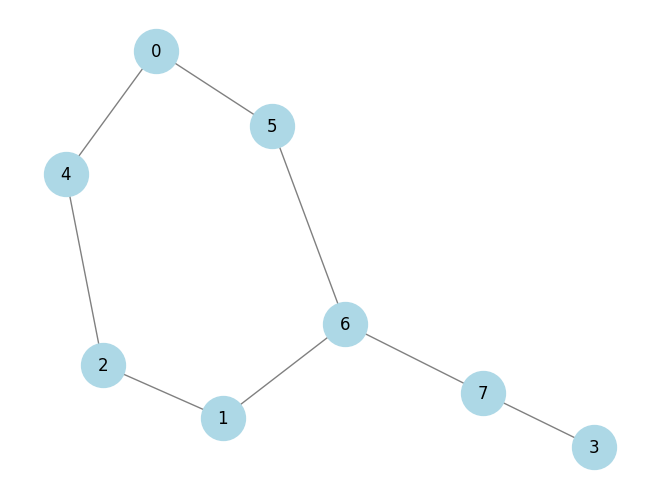

In [3]:
nx.draw(G, with_labels=True, node_size=1000, node_color='lightblue', edge_color='gray')

In [5]:
x = {n: Binary(n) for n in G.nodes}

bqm = sum(-x[i]-x[j]+2*x[i]*x[j] for i,j in G.edges)

In [6]:
sampler = dimod.SimulatedAnnealingSampler()
sample_set = sampler.sample(bqm)


solution = sample_set.first.sample
energy = sample_set.first.energy
print(f"La solución óptima es {solution} con energía {abs(energy)}")

La solución óptima es {0: 1, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0} con energía 8.0
